# **S&P Vs Hang Seng**


1)**Research Question**

I will be using the year to date data from the Hang Seng(Chinese stock index) and the S&P500(United states stock index). Looking simply at their relationship based on daily percentage change.
Do the Hang Seng and S&P 500 have the same mean daily change?

In [85]:
#imports to run code
import pandas as pd 
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os

In [21]:
#starting and ending dates using only this year because the S&P 500 changed in January 2021
start = datetime(2021,1,2)
end = datetime.today() 
sp500 =[]
hang_seng =[]

In [64]:
# sp and hang seng declared as variables
stock1 = ["^GSPC"]
stock2 = ["^HSI"]

2)**Importing Data**

Importing year to date data on both indexes using yahoo finance.

In [65]:
#getting data from yahoo and creating dataframe
df_sp = web.DataReader(stock1,"yahoo",start,end)
df_sp = df_sp.reset_index()

Attributes       Date    Adj Close        Close         High          Low  \
Symbols                      ^GSPC        ^GSPC        ^GSPC        ^GSPC   
0          2021-01-04  3700.649902  3700.649902  3769.989990  3662.709961   
1          2021-01-05  3726.860107  3726.860107  3737.830078  3695.070068   
2          2021-01-06  3748.139893  3748.139893  3783.040039  3705.340088   
3          2021-01-07  3803.790039  3803.790039  3811.550049  3764.709961   
4          2021-01-08  3824.679932  3824.679932  3826.689941  3783.600098   

Attributes         Open      Volume  
Symbols           ^GSPC       ^GSPC  
0           3764.610107  5006680000  
1           3698.020020  4582620000  
2           3712.199951  6049970000  
3           3764.709961  5080870000  
4           3815.050049  4764180000  


In [93]:
#reading data into a csv file
df_sp.to_csv('sp500.csv', index=False)

In [94]:
#cleaning data to make more readable
pc_sp = pd.read_csv('sp500.csv')
pc_sp = pc_sp.drop(pc_sp.index[0]) 
pc_sp

,Date,Adj Close,Close,High,Low,Open,Volume
1,2021-01-04,3700.64990234375,3700.64990234375,3769.989990234375,3662.7099609375,3764.610107421875,5006680000
2,2021-01-05,3726.860107421875,3726.860107421875,3737.830078125,3695.070068359375,3698.02001953125,4582620000
3,2021-01-06,3748.139892578125,3748.139892578125,3783.0400390625,3705.340087890625,3712.199951171875,6049970000
4,2021-01-07,3803.7900390625,3803.7900390625,3811.550048828125,3764.7099609375,3764.7099609375,5080870000
5,2021-01-08,3824.679931640625,3824.679931640625,3826.68994140625,3783.60009765625,3815.050048828125,4764180000
...,...,...,...,...,...,...,...
58,2021-03-26,3974.5400390625,3974.5400390625,3978.18994140625,3917.1201171875,3917.1201171875,5467850000
59,2021-03-29,3971.090087890625,3971.090087890625,3981.830078125,3943.25,3969.31005859375,4619840000
60,2021-03-30,3958.550048828125,3958.550048828125,3968.010009765625,3944.35009765625,3963.340087890625,4103570000
61,2021-03-31,3972.889892578125,3972.889892578125,3994.409912109375,3966.97998046875,3967.25,4564980000


In [70]:
#getting data from yahoo and creating dataframe
df_hs = web.DataReader(stock2, "yahoo",start,end)
df_hs = df_hs.reset_index()

Attributes       Date     Adj Close         Close          High           Low  \
Symbols                        ^HSI          ^HSI          ^HSI          ^HSI   
0          2021-01-04  27472.810547  27472.810547  27502.830078  27079.240234   
1          2021-01-05  27649.859375  27649.859375  27690.210938  27150.380859   
2          2021-01-06  27692.300781  27692.300781  27756.429688  27389.779297   
3          2021-01-07  27548.519531  27548.519531  27752.359375  27457.470703   
4          2021-01-08  27878.220703  27878.220703  27920.769531  27538.199219   

Attributes          Open      Volume  
Symbols             ^HSI        ^HSI  
0           27087.130859  2870443300  
1           27281.339844  3282490100  
2           27613.339844  3079382600  
3           27715.939453  3775142800  
4           27630.029297  5667284000  


In [95]:
#reading data into a csv file 
df_hs.to_csv('hang_seng.csv', index=False)


In [96]:
#cleaning data to make more readable
pc_hs = pd.read_csv('hang_seng.csv')
pc_hs = pc_hs.drop(pc_hs.index[0]) 
pc_hs

,Date,Adj Close,Close,High,Low,Open,Volume
1,2021-01-04,27472.810546875,27472.810546875,27502.830078125,27079.240234375,27087.130859375,2870443300
2,2021-01-05,27649.859375,27649.859375,27690.2109375,27150.380859375,27281.33984375,3282490100
3,2021-01-06,27692.30078125,27692.30078125,27756.4296875,27389.779296875,27613.33984375,3079382600
4,2021-01-07,27548.51953125,27548.51953125,27752.359375,27457.470703125,27715.939453125,3775142800
5,2021-01-08,27878.220703125,27878.220703125,27920.76953125,27538.19921875,27630.029296875,5667284000
...,...,...,...,...,...,...,...
58,2021-03-26,28336.4296875,28336.4296875,28415.150390625,28014.2890625,28043.650390625,2415384100
59,2021-03-29,28338.30078125,28338.30078125,28484.66015625,28132.359375,28317.3203125,2847744100
60,2021-03-30,28577.5,28577.5,28694.150390625,28371.23046875,28552.76953125,2269839800
61,2021-03-31,28378.349609375,28378.349609375,28802.529296875,28332.779296875,28802.529296875,2703755400


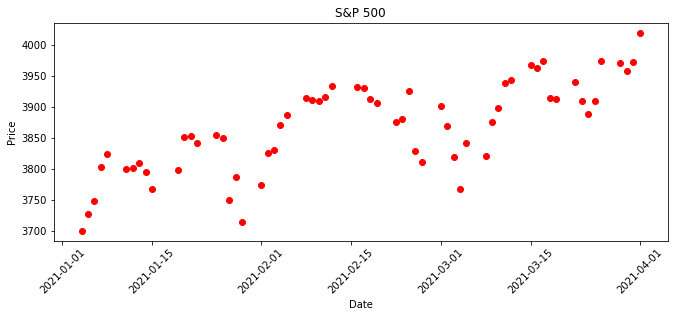

In [74]:
#sp500["Adj Close"] price YTD
plt.figure(figsize=(11,4))

y_sp= df_sp["Adj Close"]
x_sp = df_sp["Date"]
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)


plt.title('S&P 500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(x_sp, y_sp, c='red')

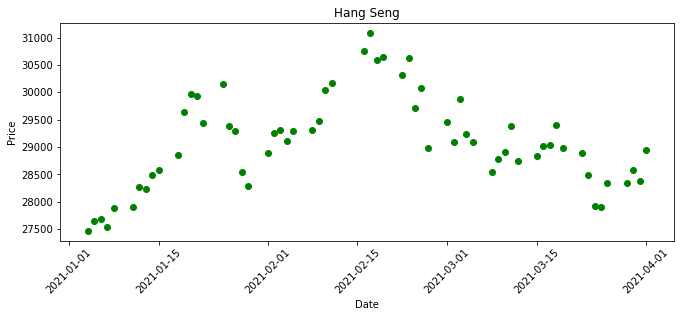

In [26]:
#hang seng["Adj Close"] price YTD
plt.figure(figsize=(11,4))

y_hs=df_hs["Adj Close"]
x_hs=df_hs["Date"]
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

plt.title('Hang Seng')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(x_hs, y_hs, c='green',)

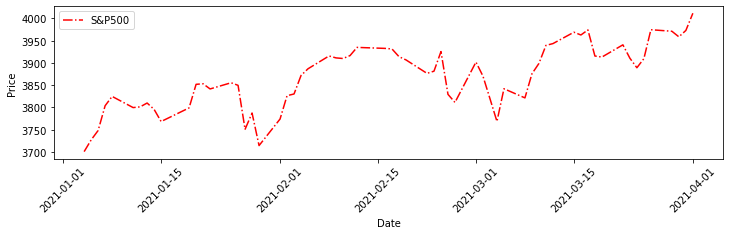

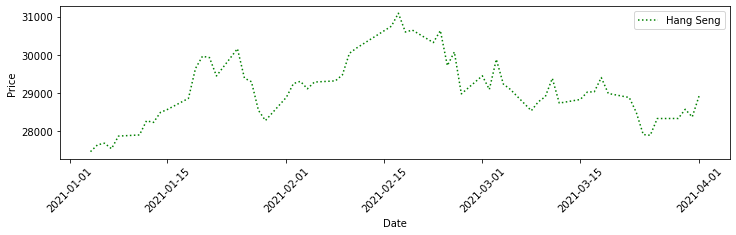

In [27]:
#Simple line chart or S&P 500 is price action
plt.figure(figsize= (12,2.8))

plt.plot(x_sp, y_sp, label= "S&P 500 Index",c='red', linestyle="-.")

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.legend(['S&P500'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
#simple line charting the Hang Seng price action
plt.figure(figsize= (12,2.8))
plt.plot(x_hs, y_hs, label= "Hang Seng Index",c='green', linestyle=":")

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.legend(['Hang Seng'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

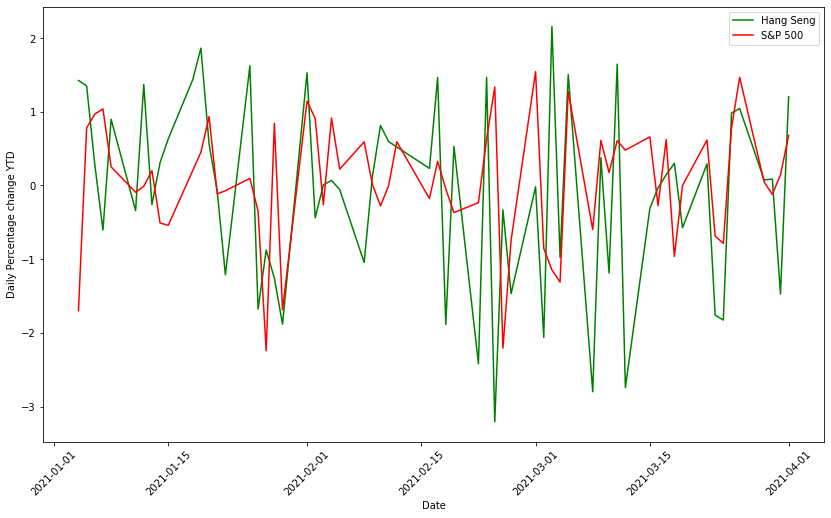

In [98]:
#percentage change to give an even metric for t-test 
plt.figure(figsize=(14,8))
a = ((df_hs["Close"]- df_hs["Open"])/(df_hs["Open"]))*100
b = ((df_sp["Close"]- df_sp["Open"])/(df_sp["Open"]))*100
plt.xlabel('Date')
plt.ylabel('Daily Percentage change YTD')

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)


plt.plot(x_hs, a, c='green')
plt.plot(x_sp, b, c='red')
#legend to show which represents which data
plt.legend(['Hang Seng','S&P 500'])

In [61]:
#Running independent sample t-test
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))


P-Value:[0.42149339] T-Statistic:[-0.80699897]


In [83]:
#Paired t-test
_,p_value=stats.ttest_rel(a,b)
print(p_value)

[0.36545245]


In [97]:
data = pd.read_csv('sp500.csv')
numeric_col = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

corr = data.loc[:,numeric_col].corr()
print(corr)

Empty DataFrame
Columns: []
Index: []


In [101]:
df_hs.corr()


,Attributes,Adj Close,Close,High,Low,Open,Volume
,Symbols,^HSI,^HSI,^HSI,^HSI,^HSI,^HSI
Attributes,Symbols,,,,,,
Adj Close,^HSI,1.000000,1.000000,0.959005,0.977445,0.908594,0.012049
Close,^HSI,1.000000,1.000000,0.959005,0.977445,0.908594,0.012049
High,^HSI,0.959005,0.959005,1.000000,0.974070,0.975934,0.114696
Low,^HSI,0.977445,0.977445,0.974070,1.000000,0.961153,0.012614
Open,^HSI,0.908594,0.908594,0.975934,0.961153,1.000000,0.093925
Volume,^HSI,0.012049,0.012049,0.114696,0.012614,0.093925,1.000000
